# Lab 2
**Name:** Jamie Vasquez-Rojas

**Date:** April 10, 2025

# Part 1 - The Ideal Case

**Second Order Differential Equation:**

\begin{equation}
\frac{d^2 y}{dt^2} = -g + \alpha \left| \frac{dy}{dt} \right|^{\gamma}
\end{equation}

Considering no drag ($\alpha = 0$)

\begin{equation}
\frac{d^2 y}{dt^2} = -g 
\end{equation}

In [4]:
#1.1 - simple caclulation: how long test mass would take to reach the bottom of the 4km shaft, assume no drag (alpha = 0)

import numpy as np

#use kinematic equation: distance = vi*t + (1/2)a*t^2, vi = 0, solve for t
def time(dist, accel):
    t = np.sqrt(2*dist/accel)
    return t

#height of the shaft
shaft = 4e3 #m
g0 = 9.81 #m/s^2 (approx.)

tB = time(shaft, g0)
print('1.1 - Simple calculation of time test mass will hit the bottom of the shaft:')
print(f'  tB = {tB} sec')

1.1 - Simple calculation of time test mass will hit the bottom of the shaft:
  tB = 28.55686245854129 sec


**1.2 - Reduce into first order diff eq:**

Rewrite the equation to make the substitution more clear:

\begin{equation}
\frac{d}{dt} \left( \frac{dy}{dt} \right) = -g 
\end{equation}

Considering $\frac{dy}{dt} = v$

\begin{equation}
\frac{d}{dt} (v) = -g = \frac{dv}{dt}
\end{equation}

So our two first order diff eq's:

\begin{equation}
\frac{dy}{dt} = v \text{     and    } \frac{dv}{dt} = -g
\end{equation}

1.4 - solve_ivp() calculation of time test mass will hit the bottom of shaft:
  tB1 = 28.556862458541282 sec


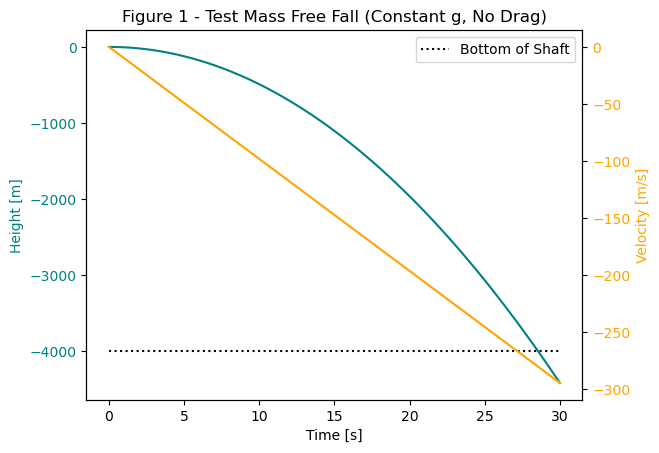

In [6]:
#1.3 - solve the system

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#constants
# use g = g0

# thing 1: derivaties
def derivatives1(t, s): #independent and state variable
    #unpack state variable
    y, v = s #y = height, v is velocity
    dydt = v
    dvdt = -g0
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0, 30) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_eval = np.linspace(t0, tf, 100)

#thing 3: initial conditions
y0 = [0, 0] #assume height and vel both start at zero

#1.4 - event detection
def overtake(t, s):
    return s[0] - (-4*10**3)

# solve!!
soln = solve_ivp(fun = derivatives1,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval, 
                events = overtake)

# plot prep
t1 = soln.t
y = soln.y[0]
v = soln.y[1]

# plottt
fig, height = plt.subplots()
#y height
height.plot(t1, y, color = 'teal')
height.set_xlabel('Time [s]')
height.set_ylabel('Height [m]', color = 'teal')
height.tick_params(axis = 'y', labelcolor = 'teal')

#v velocity
vel = height.twinx()
vel.plot(t1, v, color = 'orange')
vel.set_ylabel('Velocity [m/s]', color = 'orange')
vel.tick_params(axis = 'y', labelcolor = 'orange')

#bottom of shaft
height.hlines(-4*10**3, 0, 30, color = 'black', linestyles = 'dotted', label = 'Bottom of Shaft')
height.legend()
height.set_title('Figure 1 - Test Mass Free Fall (Constant g, No Drag)');

#1.4 - event detection
tB1 = soln.t_events[0][0] #sec

print('1.4 - solve_ivp() calculation of time test mass will hit the bottom of shaft:')
print(f'  tB1 = {tB1} sec')


In [7]:
#1.4 - comparison of tB1 and tB2

diff = tB - tB1
print('1.4 - Comparison:')
print('  The analytical calculation of the time the mass hits the bottom of the shaft (tB) is very close to the calculation made with solve_ivp event detection (tB1).')
print(f'  More specifically, they are about {diff} seconds apart.')

1.4 - Comparison:
  The analytical calculation of the time the mass hits the bottom of the shaft (tB) is very close to the calculation made with solve_ivp event detection (tB1).
  More specifically, they are about 7.105427357601002e-15 seconds apart.


# Part 2: Including Drag and a Variable $g$

Now considering drag...

\begin{equation}
\frac{d^2 y}{dt^2} = -g + \alpha \left| \frac{dy}{dt} \right|^{\gamma} = \frac{dv}{dt}
\end{equation}

Our two equations are:

\begin{equation}
\frac{dy}{dt} = v \text{    and   } \frac{dv}{dt} = -g + \alpha \left| v \right|^{\gamma} 
\end{equation}

2.2 - New fall time (no drag)
  tB2b = 28.558360607301612 sec
  Incorporating a height-dependent g has a very small effect on the fall time (still with no drag).
  In this case, the new fall time tB2b is about -0.0014981487603300536 seconds less than tB1.
2.3 - New fall time (w/drag a = 0.0039)
  tB2a = 83.28483717024244 sec
  Incorporating drag had a larger effect on the fall time. Specifically compared with tB1, this new fall time tB2a is 54.72797471170116 seconds more than tB1.
  Knowing from Lecture 16 that the mass should have a terminal speed of 50 m/s, I calibrated drag coeff a until it approached that value.


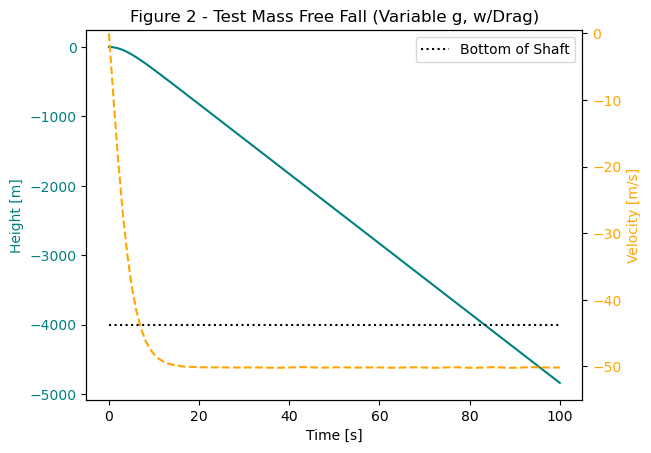

In [98]:
#can't ignore drag, can't assume g is constant
# but will be approximating that the mass of earth is distributed evenly (its NOT)

#so our new g is
r_E = 6378.1e3 #m (radius of Earth)
def g(r):
    return g0*(r/r_E)

#2.1 - new plot with g(r_E - y)
# thing 1: derivaties
#w/o drag
def derivatives2b(t, s): #independent and state variable
    #unpack state variable
    y, v = s #y = height, v is velocity
    dydt = v
    dvdt = -g(r_E + y)
    return [dydt, dvdt]

gamma = 2 #"good assumption"
a = 0.0039 #drag coeff

#with drag
def derivatives2a(t, s): #independent and state variable
    #unpack state variable
    y, v = s #y = height, v is velocity
    dydt = v
    dvdt = -g(r_E - y) + a*np.abs(v)**gamma
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0, 100) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_eval = np.linspace(t0, tf, 100)

#thing 3: initial conditions
y0 = [0, 0] #assume height and vel both start at zero

# solve!! - w/drag
soln2a = solve_ivp(fun = derivatives2a,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval,
                 events = overtake)

#w/o drag
soln2b = solve_ivp(fun = derivatives2b,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval,
                 events = overtake)

# plot prep
t2 = soln2a.t
y2 = soln2a.y[0]
v2 = soln2a.y[1]

# plottt
fig, height2 = plt.subplots()
#y height
height2.plot(t2, y2, color = 'teal')
height2.set_xlabel('Time [s]')
height2.set_ylabel('Height [m]', color = 'teal')
height2.tick_params(axis = 'y', labelcolor = 'teal')

#v velocity
vel2 = height2.twinx()
vel2.plot(t2, v2, '--', color = 'orange')
vel2.set_ylabel('Velocity [m/s]', color = 'orange')
vel2.tick_params(axis = 'y', labelcolor = 'orange')
vel2.set_ylim(-55, 0.5)

#bottom of shaft
height2.hlines(-4*10**3, 0, 100, color = 'black', linestyles = 'dotted', label = 'Bottom of Shaft')

height2.set_title('Figure 2 - Test Mass Free Fall (Variable g, w/Drag)')
height2.legend()
#event detection - variable g, w/o drag
tB2b = soln2b.t_events[0][0] #sec

#event detection - variable g, w/ drag
tB2a = soln2a.t_events[0][0] #sec

print('2.2 - New fall time (no drag)')
print(f'  tB2b = {tB2b} sec')

#w/o drag
diff2b = tB1 - tB2b

#w/ drag
diff2a = tB2a - tB1

print('  Incorporating a height-dependent g has a very small effect on the fall time (still with no drag).')
print(f'  In this case, the new fall time tB2b is about {diff2b} seconds less than tB1.')

print(f'2.3 - New fall time (w/drag a = {a})')
print(f'  tB2a = {tB2a} sec')
print(f'  Incorporating drag had a larger effect on the fall time. Specifically compared with tB1, this new fall time tB2a is {diff2a} seconds more than tB1.')
print('  Knowing from Lecture 16 that the mass should have a terminal speed of 50 m/s, I calibrated drag coeff a until it approached that value.')


plt.savefig('F2-FreeFall.png', dpi =300)

# Part 3: The Coriolis Force

**3.1 - Extending and updating the diff eqs. to include the Coriolis force:**

Since the forces vary along the $\hat{x}$ (along East), $\hat{y}$ (down the mineshaft), and $\hat{z}$ (along North) directions, we need to break our current equations down into those components to sum the forces.

Start with the sum of forces along each direction.

\begin{equation}
F_{\text{x, tot}} = m a_{\text{x, tot}} = m \left( \frac{dv}{dt} \right)_x + F_{c, x}
\end{equation}

\begin{equation}
F_{\text{y, tot}} = m a_{\text{y, tot}} = m \left( \frac{dv}{dt} \right)_y + F_{c, y}
\end{equation}

\begin{equation}
F_{\text{z, tot}} = 0
\end{equation}

We can first focus on the x-direction:

\begin{equation}
m a_{\text{x, tot}} = m \left( \frac{dv}{dt} \right)_x + F_{c, x}
\end{equation}

We're given that $F_{c, x} = +2m\Omega v_y$, and we've previously defined $\frac{dv}{dt} = -g + \alpha \left| v \right|^{\gamma}$. So, substitute these in:

\begin{equation}
m a_{\text{x, tot}} = m \left( -g + \alpha \left| v \right|^{\gamma} \right)_x +2 m \Omega v_y
\end{equation}

The $m$'s will cancel, and then rewrite some things:

\begin{equation}
\left( \frac{dv}{dt} \right)_{\text{x, tot}} = -g_x + \alpha \left| v_x \right|^{\gamma} +2 \Omega v_y
\end{equation}

and since there is no gravity in the x-direction, $g_x = 0$. So, one of our equations is:

\begin{equation}
\left( \frac{dv}{dt} \right)_{\text{x, tot}} = \alpha \left| v_x \right|^{\gamma} +2 \Omega v_y
\end{equation}

Similar process for the y-direction:

\begin{equation}
m a_{\text{y, tot}} = m \left( \frac{dv}{dt} \right)_y + F_{c, y}
\end{equation}

This time, use the given equation $F_{c, x} = -2m\Omega v_x$.

\begin{equation}
m a_{\text{y, tot}} = m \left( -g + \alpha \left| v \right|^{\gamma} \right)_y - 2 m \Omega v_x
\end{equation}

And we get another equation:

\begin{equation}
\left( \frac{dv}{dt} \right)_{\text{y, tot}} = -g_y + \alpha \left| v_y \right|^{\gamma} - 2\Omega v_x
\end{equation}

The remaining equations are simply defined as:

\begin{equation}
\frac{dy}{dt} = v_y
\end{equation}

\begin{equation}
\frac{dx}{dt} = v_x
\end{equation}

3.3 - Comparing times (w/o drag)
  Time ball hits the shaft wall: twall = 21.90655678266907 sec
  Time ball reaches the bottom: tground = 28.555390744191484 sec
  Therefore, the ball bumps into the wall first before hitting the ground since twall < tground.
3.4 - Comparing times (w/drag)
  Time ball hits the shaft wall: twall_d = 29.59383332316062 sec
  Time ball reaches the bottom: tground_d = 83.28708684895012 sec
  The ball still bumps into wall first before hitting the bottom of the shaft since twall_d < tground_d.
  However, drag does increase both tground_d (like we saw in section 2) and twall_d.)
  Specifically, twall_d was increased by 7.687276540491549 sec.


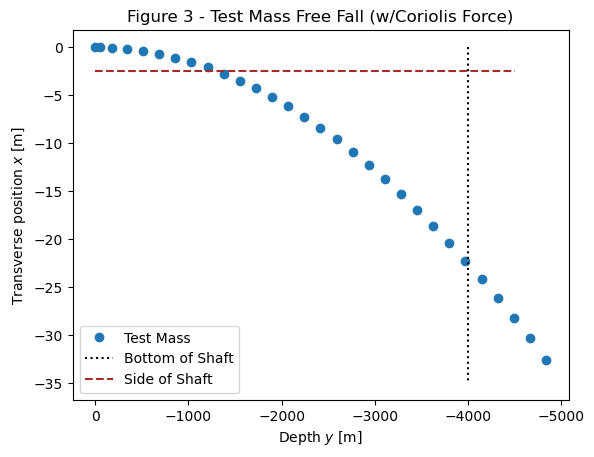

In [13]:
#3.1 - update diff eqs to include Coriolis force, but NO DRAG
Omega = 7.272*10**(-5) #rad/s
gamma = 0
a = 0

def derivatives3(t, s): #independent and state variable
    #unpack state variable
    y, x, v_x, v_y = s #y = height, v is velocity
    dydt = v_y
    dxdt = v_x
    dvdt_x = a*np.abs(v_x)**gamma + 2*Omega*v_y 
    dvdt_y = -g(r_E - y) + a*np.abs(v_y)**gamma -2*Omega*v_x
    return [dydt, dxdt, dvdt_x, dvdt_y]

# thing 2: time span
t0, tf = (0, 30) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_eval = np.linspace(t0, tf, 30)

#thing 3: initial conditions
y0 = [0, 0, 0, 0] #assume positions and velocities start at zero

#3.3 - event detection
def wall(t, s):
    return s[1] - (-2.5) #half of the 5m wide shaft, since dropped from center

#solve w/o drag
soln3 = solve_ivp(fun = derivatives3,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval,
                 events = (wall, overtake))

#event detection - w/o drag
print('3.3 - Comparing times (w/o drag)')
twall = soln3.t_events[0][0] #sec
print(f'  Time ball hits the shaft wall: twall = {twall} sec')
tground = soln3.t_events[1][0] #sec
print(f'  Time ball reaches the bottom: tground = {tground} sec')
print(f'  Therefore, the ball bumps into the wall first before hitting the ground since twall < tground.')

#3.4 - turning drag back on ----------------------------------------
gamma = 2 #"good assumption"
a = 0.0039 #drag coeff

def derivatives3drag(t, s): #independent and state variable
    #unpack state variable
    y, x, v_x, v_y = s #y = height, v is velocity
    dydt = v_y
    dxdt = v_x
    dvdt_x = a*np.abs(v_x)**gamma + 2*Omega*v_y 
    dvdt_y = -g(r_E - y) + a*np.abs(v_y)**gamma -2*Omega*v_x
    return [dydt, dxdt, dvdt_x, dvdt_y]

# thing 2: time span
t0, tf = (0, 100) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_evald = np.linspace(t0, tf, 30)


#solve w/ drag
soln3d = solve_ivp(fun = derivatives3drag,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_evald,
                 events = (wall, overtake))

#event detection - w/ drag
print('3.4 - Comparing times (w/drag)')
twalld = soln3d.t_events[0][0] #sec
print(f'  Time ball hits the shaft wall: twall_d = {twalld} sec')
tgroundd = soln3d.t_events[1][0] #sec
print(f'  Time ball reaches the bottom: tground_d = {tgroundd} sec')
print(f'  The ball still bumps into wall first before hitting the bottom of the shaft since twall_d < tground_d.')
print('  However, drag does increase both tground_d (like we saw in section 2) and twall_d.)')
print(f'  Specifically, twall_d was increased by {twalld - twall} sec.')

# plot prep
t3d = soln3d.t
y3d = soln3d.y[0]
x3d = soln3d.y[1]
v_x3d = soln3d.y[2]
v_y3d = soln3d.y[3]

fig, coriolis = plt.subplots()
coriolis.plot(y3d, x3d, 'o', label = 'Test Mass')
coriolis.set_xlabel('Depth $y$ [m]')
coriolis.set_ylabel('Transverse position $x$ [m]')
coriolis.set_title('Figure 3 - Test Mass Free Fall (w/Coriolis Force)')
coriolis.vlines(-4*10**3, 0, -35, color = 'black', linestyles = 'dotted', label = 'Bottom of Shaft')
coriolis.hlines(-2.5, 0, -4500, color = 'brown', linestyles = 'dashed', label = 'Side of Shaft')
coriolis.invert_xaxis()
coriolis.legend(loc = 'lower left');

## Part 4: An infinitely deep mine

4.2 - Time object reaches the other side:
  t_otherside = 3798.7492167082196 sec
4.2 - Time object reaches the center of Earth:
  t_center = 1266.460964545638 sec
4.2 - Speed object reaches the center of Earth:
v_center = -7909.916910938911 m/s


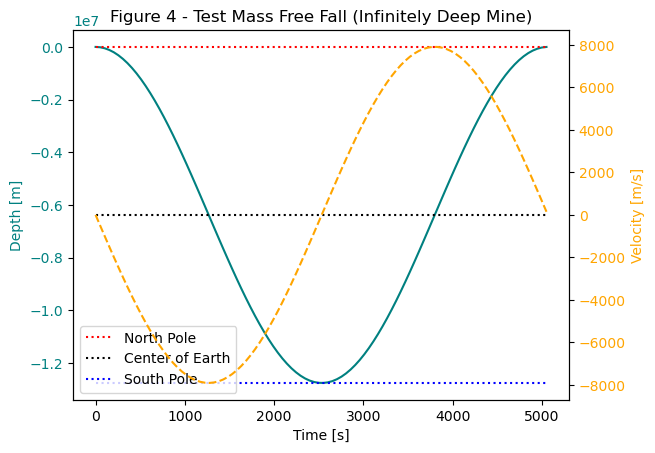

In [15]:
#ignore coriolis force and drag force

# thing 1: derivaties
#w/o drag
def derivatives4(t, s): #independent and state variable
    #unpack state variable
    y, v = s #y = height, v is velocity
    dydt = v
    dvdt = -g(r_E + y)
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0, 5050) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_eval = np.linspace(t0, tf, 100)

#thing 3: initial conditions
y0 = [0, 0] #assume height and vel both start at zero

#4.3 - event detection (center and reach other side of Earth)
def center(t, s):
    return s[0] + r_E

def otherside(t, s):
    return s[1] #when v = 0

#w/o drag
soln4 = solve_ivp(fun = derivatives4,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval,
                 events = (center, otherside))

# plot prep
t4 = soln4.t
y4 = soln4.y[0]
v4 = soln4.y[1]

# plottt
fig, depth = plt.subplots()
#y height
depth.plot(t4, y4, color = 'teal')
depth.set_xlabel('Time [s]')
depth.set_ylabel('Depth [m]', color = 'teal')
depth.set_title('Figure 4 - Test Mass Free Fall (Infinitely Deep Mine)')
depth.tick_params(axis = 'y', labelcolor = 'teal')

depth.hlines(0, t0, tf, color = 'red', linestyles = 'dotted', label = 'North Pole')
depth.hlines(-r_E, t0, tf, color = 'black', linestyles = 'dotted', label = 'Center of Earth')
depth.hlines(-2*r_E, t0, tf, color = 'blue', linestyles = 'dotted', label = 'South Pole')
depth.legend()

#v velocity
vel4 = depth.twinx()
vel4.plot(t4, v4, '--', color = 'orange')
vel4.set_ylabel('Velocity [m/s]', color = 'orange')
vel4.tick_params(axis = 'y', labelcolor = 'orange')

t_center = soln4.t_events[0][0]

t_otherside = soln4.t_events[0][1]

print('4.2 - Time object reaches the other side:')
print(f'  t_otherside = {t_otherside} sec')

print('4.2 - Time object reaches the center of Earth:')
print(f'  t_center = {t_center} sec')

print('4.2 - Speed object reaches the center of Earth:')
print(f'v_center = {min(v4)} m/s')

**4.3 - Comparing "crossing-time" to the orbital period**

We're given that the object's centripetal acceleration is in balance with the force of gravity with:

\begin{equation}
\frac{v^2}{R} = \frac{GM}{R^2}
\end{equation}

We can use this to find the orbital period $T$. First, solve for $v$.

\begin{equation}
v^2 = \frac{GM}{R}
\end{equation}

\begin{equation}
v = \sqrt{\frac{GM}{R}} = \frac{2\pi R}{T}
\end{equation}

Now solve for $T$.

\begin{equation}
\sqrt{\frac{GM}{R}} = \frac{2\pi R}{T}
\end{equation}

\begin{equation}
\frac{T}{2\pi R} = \sqrt{\frac{R}{GM}}
\end{equation}

\begin{equation}
\left( \frac{T}{2\pi R} \right)^2 = \frac{R}{GM}
\end{equation}

\begin{equation}
\frac{T^2}{4\pi^2 R^2} = \frac{R}{GM}
\end{equation}

\begin{equation}
T^2 = \frac{4\pi^2 R^3}{GM}
\end{equation}

\begin{equation}
T = \sqrt{\frac{4\pi^2 R^3}{GM}}
\end{equation}

In [17]:
#calculate the orbital period T
G = 6.6743 * 10 ** (-11) #m^3 / kg / s^2
M_E = 5.972 * 10 ** (24) # kg (earth mass)

T = np.sqrt((4 * np.pi **2 * r_E ** 3)/(G * M_E)) #s
print('4.3 - Compare crossing time with orbital period')
print(f'Period T = {T} sec')
print(f'T is {T/t_center} times greater than t_center.')
print(f'T is {T/t_otherside} times greater than t_otherside.')

4.3 - Compare crossing time with orbital period
Period T = 5069.371199675784 sec
T is 4.002785195589899 times greater than t_center.
T is 1.3344843027223086 times greater than t_otherside.


## Part 5: A non-uniform Earth

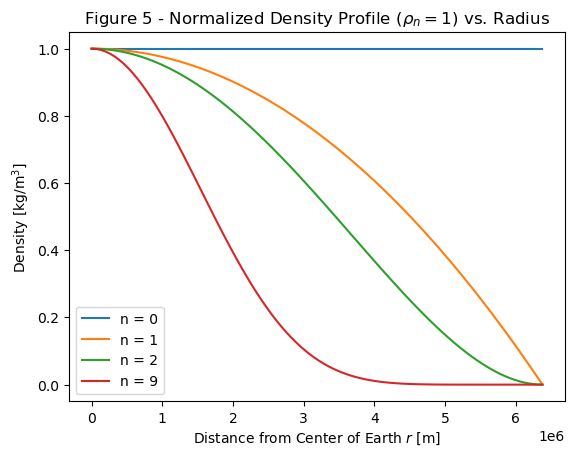

In [96]:
#5.1 - Plot the normalized density profile (p_n = 1) as a function of radius for n = 0, 1, 2, 9

#define density
def density(r, n, p_n):
    return p_n*np.power(1 - r** 2/ (r_E**2), n)
#r = dist from center of Earth (m)
#n = some exponent 
#p_n = normalizing constant #kg/m^3

#range of radii
r_range = np.linspace(0, r_E, 100)

#at n = 0, 1, 2, 9 (p_n = 1)
d_0 = density(r_range, 0, 1)
d_1 = density(r_range, 1, 1)
d_2 = density(r_range, 2, 1)
d_9 = density(r_range, 9, 1)

#plotting
fig, norm_dense = plt.subplots()

norm_dense.plot(r_range, d_0, label = 'n = 0')
norm_dense.plot(r_range, d_1, label = 'n = 1')
norm_dense.plot(r_range, d_2, label = 'n = 2')
norm_dense.plot(r_range, d_9, label = 'n = 9')

norm_dense.set_xlabel('Distance from Center of Earth $r$ [m]')
norm_dense.set_ylabel('Density [kg/m$^3$]')
norm_dense.set_title('Figure 5 - Normalized Density Profile $(\\rho_n = 1)$ vs. Radius')
norm_dense.legend()

plt.savefig('F6-NormDens.png', dpi =300)

5 - Computing density constant p_n (kg/m^3)
  p_0 = 5494.8674095512
  p_1 = 13737.168523877996
  p_2 = 24040.044916786497
  p_9 = 135545.12141863423


/var/folders/x9/k74nffc13jq8chhprlbsbrnc0000gn/T/ipykernel_83566/1629811181.py:58: RuntimeWarning: invalid value encountered in divide
  F_0 = G*M_0/(r_range**2)
/var/folders/x9/k74nffc13jq8chhprlbsbrnc0000gn/T/ipykernel_83566/1629811181.py:59: RuntimeWarning: invalid value encountered in divide
  F_1 = G*M_1/(r_range**2)
/var/folders/x9/k74nffc13jq8chhprlbsbrnc0000gn/T/ipykernel_83566/1629811181.py:60: RuntimeWarning: invalid value encountered in divide
  F_2 = G*M_2/(r_range**2)
/var/folders/x9/k74nffc13jq8chhprlbsbrnc0000gn/T/ipykernel_83566/1629811181.py:61: RuntimeWarning: invalid value encountered in divide
  F_9 = G*M_9/(r_range**2)


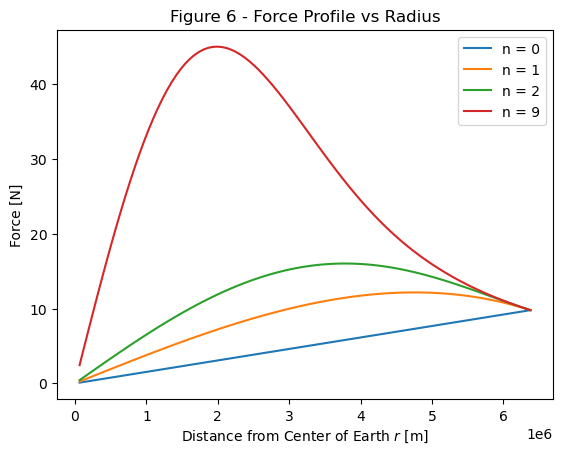

In [94]:
#5.2 - plot force profile as a function of radius for n = 0, 1, 2, 9

#to find force, do F = M*a
from scipy.integrate import quad

# what needs to be integrated
def integrand(r, n, p_n):
    return (p_n*np.power(1 - r** 2/ (r_E**2), n))*r**2

#5 - computing density constant
# take out p_n from the integral, and solve for it afterwards
sum0, err = quad(integrand, 0, r_E, args = (0, 1)) #set p_n to 1 just so it doesn't do anything
p_0 = M_E/(4  * np.pi * sum0)

sum1, err = quad(integrand, 0, r_E, args = (1, 1))
p_1 = M_E/(4  * np.pi * sum1)

sum2, err = quad(integrand, 0, r_E, args = (2, 1))
p_2 = M_E/(4  * np.pi * sum2)

sum9, err = quad(integrand, 0, r_E, args = (9, 1))
p_9 = M_E/(4  * np.pi * sum9)

print('5 - Computing density constant p_n (kg/m^3)')
print(f'  p_0 = {p_0}')
print(f'  p_1 = {p_1}')
print(f'  p_2 = {p_2}')
print(f'  p_9 = {p_9}')

#find the mass by integrating density (based on what's given)
# n = 0
int_0 = np.zeros(len(r_range))
for i in range(len(r_range)):
    int_0[i] = quad(integrand, 0, r_range[i], args = (0, p_0))[0]

# n = 1
int_1 = np.zeros(len(r_range))
for i in range(len(r_range)):
    int_1[i] = quad(integrand, 0, r_range[i], args = (1, p_1))[0]

# n = 2
int_2 = np.zeros(len(r_range))
for i in range(len(r_range)):
    int_2[i] = quad(integrand, 0, r_range[i], args = (2, p_2))[0]

# n = 9
int_9 = np.zeros(len(r_range))
for i in range(len(r_range)):
    int_9[i] = quad(integrand, 0, r_range[i], args = (9, p_9))[0]

#the masses for each n
M_0 = 4*np.pi*int_0
M_1 = 4*np.pi*int_1
M_2 = 4*np.pi*int_2
M_9 = 4*np.pi*int_9

#acceleration would just be gravity (function g), then multiply with mass to find force
F_0 = G*M_0/(r_range**2)
F_1 = G*M_1/(r_range**2)
F_2 = G*M_2/(r_range**2)
F_9 = G*M_9/(r_range**2)

#plot F vs r for n = 0, 1, 2, 9
fig, forces = plt.subplots()
forces.plot(r_range, F_0, label = 'n = 0')
forces.plot(r_range, F_1, label = 'n = 1')
forces.plot(r_range, F_2, label = 'n = 2')
forces.plot(r_range, F_9, label = 'n = 9')

forces.set_xlabel('Distance from Center of Earth $r$ [m]')
forces.set_ylabel('Force [N]')
forces.set_title('Figure 6 - Force Profile vs Radius')
forces.legend()

plt.savefig('F6-ForceProfile.png', dpi =300)

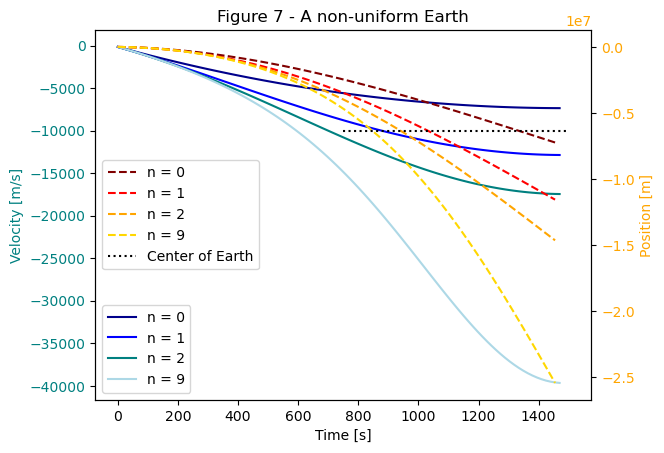

In [21]:
#5.3 - plot position and velocity as a function of time for n = 0, 1, 2, 9
# if F = M*g
# g = F/M
# use numerical integration since F is an array of values already

from scipy.integrate import cumulative_trapezoid
#time range
num = 100
t_0 = 0
t_f = 1500
t_range = np.linspace(t_0, t_f, num) #s

# n = 0 --------------
g_0 = -np.flip(F_0) #flip it because F_0 originally goes from the center of earth outward

#integrate accel to get v
v_0 = cumulative_trapezoid(g_0, t_range, dx = 1.0)

#integrate v to get pos
x_0 = cumulative_trapezoid(v_0, t_range[0: num - 1], dx = 1.0)

#repeat for other n's
# n = 1 --------------
g_1 = -np.flip(F_1) 

#integrate accel to get v
v_1 = cumulative_trapezoid(g_1, t_range, dx = 1.0)

#integrate v to get pos
x_1 = cumulative_trapezoid(v_1, t_range[0: num - 1], dx = 1.0)

# n = 2 --------------
g_2 = -np.flip(F_2)

#integrate accel to get v
v_2 = cumulative_trapezoid(g_2, t_range, dx = 1.0)

#integrate v to get pos
x_2 = cumulative_trapezoid(v_2, t_range[0: num - 1], dx = 1.0)

# n = 9 --------------
g_9 = -np.flip(F_9)

#integrate accel to get v
v_9 = cumulative_trapezoid(g_9, t_range, dx = 1.0)

#integrate v to get pos
x_9 = cumulative_trapezoid(v_9, t_range[0: num - 1], dx = 1.0)

fig, nonuni_v = plt.subplots()
nonuni_v.plot(t_range[0:num - 1], v_0, color = 'darkblue', label = 'n = 0')
nonuni_v.plot(t_range[0:num - 1], v_1, color = 'blue', label = 'n = 1')
nonuni_v.plot(t_range[0:num - 1], v_2, color = 'teal', label = 'n = 2')
nonuni_v.plot(t_range[0:num - 1], v_9, color = 'lightblue', label = 'n = 9')

nonuni_v.set_xlabel('Time [s]')
nonuni_v.set_ylabel('Velocity [m/s]', color = 'teal')
nonuni_v.tick_params(axis = 'y', labelcolor = 'teal')
nonuni_v.legend(loc = 'lower left')
nonuni_v.set_title('Figure 7 - A non-uniform Earth')

#position 
nonuni_p = nonuni_v.twinx()
nonuni_p.plot(t_range[0:num - 2], x_0, '--', color = 'maroon', label = 'n = 0')
nonuni_p.plot(t_range[0:num - 2], x_1, '--', color = 'red', label = 'n = 1')
nonuni_p.plot(t_range[0:num - 2], x_2, '--', color = 'orange', label = 'n = 2')
nonuni_p.plot(t_range[0:num - 2], x_9, '--', color = 'gold', label = 'n = 9')

nonuni_p.hlines(-r_E, t_0+t_f/2, t_f, color = 'black', linestyles = 'dotted', label = 'Center of Earth')

nonuni_p.set_ylabel('Position [m]', color = 'orange')
nonuni_p.tick_params(axis = 'y', labelcolor = 'orange')
nonuni_p.legend(loc = 'center left')


In [22]:
#5.4 - for n = 0, 1, 2, 9, compute the time to reach the center and speed there


## Part 6: A lunar mine shaft

In [59]:
#6.1 - compute the travel time to center of moon (pole2pole mineshaft)
# no coriolis, ignore drag

#so our new g is
g_M = 1.625 #m/s^2
r_M = 1738.1e3 #m (radius of Earth)
def gM(r):
    return g_M*(r/r_M)

# thing 1: derivaties
#w/o drag
def derivatives6(t, s): #independent and state variable
    #unpack state variable
    y, v = s #y = height, v is velocity
    dydt = v
    dvdt = -gM(r_M + y)
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0, 5000) #sec (from 0 to slightly past when it hits the bottom (t ~ 28 s))
t_eval = np.linspace(t0, tf, 100)

#thing 3: initial conditions
y0 = [0, 0] #assume height and vel both start at zero

#4.3 - event detection (center and reach other side of Earth)
def center(t, s):
    return s[0] + r_M

#w/o drag
soln6 = solve_ivp(fun = derivatives6,
                 t_span = (t0, tf), 
                 y0 = y0,
                 t_eval = t_eval,
                 events = (center, otherside))

t6 = soln6.t
y6 = soln6.y[0]
v6 = soln6.y[1]

t_center = soln6.t_events[0][0]

print('6.1 - Pole-to-pole mineshaft, time to reach center of moon')
print(f't_center = {t_center} sec')

6.1 - Pole-to-pole mineshaft, time to reach center of moon
t_center = 1624.348583492682 sec


In [76]:
#6.2 - what is the density (assume constant) of the moon compared with earth's
M_M = 7.35 * 10 ** (22) #kg
V_M = (4/3)*np.pi * (r_M**3) #m^3
dense_M = M_M/(V_M)

print('6.2 - Moon Density vs Earth Density')
print(f'dense_M = {dense_M} kg/m^3')

print('')

6.2 - Moon Density vs Earth Density
dense_M = 3341.753803870318 kg/m^3


**6.3 - how does fall/orbit time depend on density?**

\begin{equation}
F = \frac{GMm}{r^2} = ma = m \frac{d^2 y}{d t^2}
\end{equation}

\begin{equation}
\rho \propto \frac{1}{t^2}
\end{equation}

\begin{equation}
t^2 \propto \frac{1}{\rho}
\end{equation}

\begin{equation}
t \propto \frac{1}{\sqrt{\rho}}
\end{equation}